In [1]:
# At the end of this step, you will understand the concepts 
# of underfitting and overfitting, and you will be able to 
# apply these ideas to make your models more accurate

# In practice, it's not uncommon for a tree to have 10 splits 
# between the top level (all houses) and a leaf. As the tree 
# gets deeper, the dataset get sliced up into leavs with fewer
# houses. If a tree only had 1 split, it divides the data into
# 2 groups. If each group is split again, we would get 4 groups
# of houses. Splitting each of those again would create 8 groups.

# When we divide the houses amongst many leaves, we also have 
# fewer houses in each leaf. Leaves with very few houses will 
# make predictions that are quite close to those homes's actual
# values, but they may make very unreliable predictions for 
# new data (because each prediction is based on only few houses)

# At an extreme, if a tree divides houses into only 2 or 4, 
# each group will has a wide variety of houses. Resulting
# predictions may be far off for most houses, even in the 
# training data (and it will be bad in validation too for the 
# same reason). When a model fails to capture important 
# destinctions and patterns in the data, so it performs poorly
# even in training data, that is called underfitting.

# There are a few alternatives for controlling the tree depth, 
# and many allow for some routes through the tree to have 
# greater depth than other routes. But the max_leaf_nodes 
# argument provides a very sensible way to control overfitting
# vs underfitting. The more leaves we allow the model to make, 
# the more we move from the underfitting area in the above 
# graph to the overfitting area.



In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]
# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 1)

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae



In [14]:
nodes = []
maes = []

for max_leaf_nodes in range(5,1000,25):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    nodes.append(max_leaf_nodes)
    maes.append(my_mae)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 35044
Max leaf nodes: 30 		 Mean Absolute Error: 28877
Max leaf nodes: 55 		 Mean Absolute Error: 27662
Max leaf nodes: 80 		 Mean Absolute Error: 27389
Max leaf nodes: 105 		 Mean Absolute Error: 27171
Max leaf nodes: 130 		 Mean Absolute Error: 27638
Max leaf nodes: 155 		 Mean Absolute Error: 27308
Max leaf nodes: 180 		 Mean Absolute Error: 27854
Max leaf nodes: 205 		 Mean Absolute Error: 27866
Max leaf nodes: 230 		 Mean Absolute Error: 27744
Max leaf nodes: 255 		 Mean Absolute Error: 27915
Max leaf nodes: 280 		 Mean Absolute Error: 28331
Max leaf nodes: 305 		 Mean Absolute Error: 28425
Max leaf nodes: 330 		 Mean Absolute Error: 28344
Max leaf nodes: 355 		 Mean Absolute Error: 28514
Max leaf nodes: 380 		 Mean Absolute Error: 28663
Max leaf nodes: 405 		 Mean Absolute Error: 28790
Max leaf nodes: 430 		 Mean Absolute Error: 28886
Max leaf nodes: 455 		 Mean Absolute Error: 29052
Max leaf nodes: 480 		 Mean Absolute Error: 29311
Max l

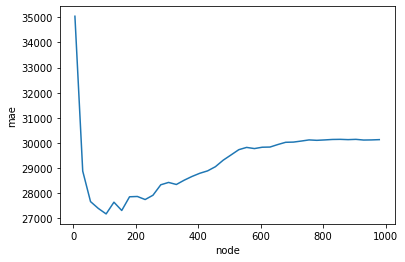

In [17]:
# Here's the takeaway: Models can suffer from either:
# * Overfitting: capturing spurious patterns that won't recur 
# in the future, leading to less accurate predictions.
# * Underfitting: failing to capture relevant paterns, again
# leading to less accurate predictions.

import matplotlib.pyplot as plt
#print(nodes)
#print(maes)

plt.xlabel("node")
plt.ylabel("mae")

plt.plot(nodes, maes)

plt.show()

